# **DataVisualisation**

## Objectives

- Fetch data from Kaggle, save as raw data and prepare it for further processes.

## Inputs

- Kaggle JSON file - the token is required for kaggle authentication. 

## Outputs

- Generate the Dataset: inputs/cherry_leaves_dataset.

## Additional Comments

- No additional comments here.


---


# Import packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread

Change the working directory

In [2]:
cwd= os.getcwd()

In [3]:
os.chdir('/workspace/mildew-detection-in-cherry-leaves')
print("You set a new current directory")

You set a new current directory



You set a new current directory

In [4]:
work_dir = os.getcwd()
work_dir

'/workspace/mildew-detection-in-cherry-leaves'

---

### Set input directories

Set train,validation and test paths

In [5]:
my_data_dir = 'inputs/cherry_leaves_dataset/cherry-leaves'
train_path = my_data_dir + '/train' 
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

### Set output directory

In [6]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('The old version is already available, please create a new version.')
    pass
else:
    os.makedirs(name=file_path)

### Set label names

In [7]:

labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['healthy', 'powdery_mildew']


---

# Data visualization of image

---

## Determine Average Images Size on Train Set

Compute average images size on train set.

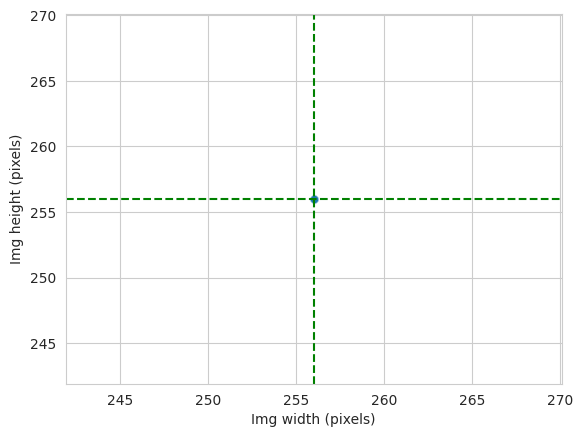

Img width average: 256 
Img height average: 256


In [10]:
dim1, dim2 = [], []
for label in labels:
    for img_filename in os.listdir(train_path + '/' + label):
        img = imread(train_path + '/' + label + '/' + img_filename)
        d1, d2, colors = img.shape
        dim1.append(d1) 
        dim2.append(d2) 

sns.set_style("whitegrid")
fig, axes = plt.subplots()
sns.scatterplot(x=dim2, y=dim1, alpha=0.2)
axes.set_xlabel("Img width (pixels)")
axes.set_ylabel("Img height (pixels)")
dim1_mean = int(np.array(dim1).mean())
dim2_mean = int(np.array(dim2).mean())
axes.axvline(x=dim1_mean, color='g', linestyle='--')
axes.axhline(y=dim2_mean, color='g', linestyle='--')
plt.show()
print(f"Img width average: {dim2_mean} \nImg height average: {dim1_mean}")


Bar plot to confirm the average image size on the train set.

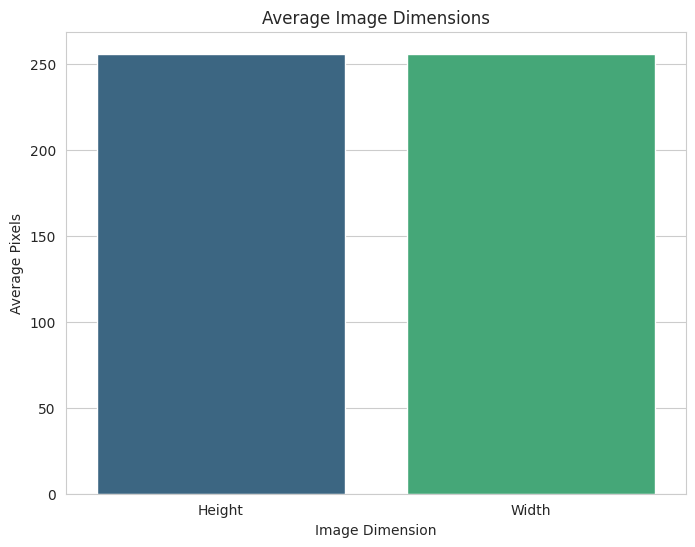

Img width average: 256 
Img height average: 256


In [12]:
dim1_mean = int(np.array(dim1).mean())
dim2_mean = int(np.array(dim2).mean())

dimensions = ['Height', 'Width']
mean_values = [dim1_mean, dim2_mean]

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x=dimensions, y=mean_values, palette='viridis', ax=ax)
ax.set_xlabel("Image Dimension")
ax.set_ylabel("Average Pixels")
ax.set_title("Average Image Dimensions")

plt.show()
print(f"Img width average: {dim2_mean} \nImg height average: {dim1_mean}")

### Images Size For Training The Model Is The Average From All images In The Train Set.

In [13]:
img_shape = (dim1_mean, dim2_mean, 3)
img_shape

(256, 256, 3)

In [14]:

joblib.dump(value=img_shape ,
            filename=f"{file_path}/img_shape.pkl")

['outputs/v1/img_shape.pkl']

---
